In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-prediction/data.csv


In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.layers import Dense, BatchNormalization, Dropout
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
import matplotlib.pyplot as plt
import os, math
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score, classification_report, confusion_matrix

In [6]:
dfMerge = pd.read_csv('/kaggle/input/breast-cancer-prediction/data.csv')
dfMerge = dfMerge.iloc[:, 1:]
dfMerge

,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
target = {k:v for k, v in zip(dfMerge.iloc[:, 0].unique(), list(range(len(dfMerge.iloc[:, 1].unique()))))}
dfMerge.iloc[:, 0] = dfMerge.iloc[:, 0].map(target)
dfMerge

,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
def create_data(dfMerge):
    x = np.array(dfMerge.iloc[:, 1:])
    y = np.asarray(dfMerge.iloc[:, 0]).astype('int64')
    
    X_train, X_test, y_train, y_test = train_test_split(x, y)
    
    sc = MinMaxScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    X_train = tf.cast(X_train, tf.float64)
    X_test = tf.cast(X_test, tf.float64)
    y_train = tf.cast(y_train, tf.int64)
    y_test = tf.cast(y_test, tf.int64)
    
    train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(16)
    test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(16)
    
    return train_ds, test_ds

In [9]:
train_ds, test_ds = create_data(dfMerge)

2023-01-23 17:56:24.636250: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
def GELU(x):
    res = 0.5 * x * (1 + tf.nn.tanh(math.sqrt(2 / math.pi) * (x + 0.044715 * (x ** 3))))
    return res



class ResMLPBlock(tf.keras.layers.Layer):
    def __init__(self, units, residual_path):
        super(ResMLPBlock, self).__init__()
        self.residual_path = residual_path
        self.D1 = Dense(units, activation='relu')
        self.D2 = Dense(units, activation='relu')

        if self.residual_path:
            self.D3 = Dense(units)
            self.D4 = Dense(units)

    def call(self, inputs):
        residual = inputs

        x = self.D1(inputs)
        y = self.D2(x)

        if self.residual_path:
            residual = self.D3(inputs)
            residual = GELU(residual)
            residual = self.D4(residual)
            residual = GELU(residual)

        output = y + residual
        return output



class ResMLP(tf.keras.Model):
    def __init__(self, initial_filters, block_list, num_classes):
        super(ResMLP, self).__init__()
        self.initial_filters = initial_filters
        self.block_list = block_list

        self.D1 = Dense(self.initial_filters, activation='relu')
        self.B1 = BatchNormalization()

        self.blocks = tf.keras.models.Sequential()
        for block_id in range(len(block_list)):
            for layer_id in range(block_list[block_id]):
                if block_id != 0 and layer_id == 0:
                    block = ResMLPBlock(units=self.initial_filters, residual_path=True)
                else:
                    block = ResMLPBlock(units=self.initial_filters, residual_path=False)
                self.blocks.add(block)
            self.initial_filters *= 2

        self.D2 = Dense(num_classes, activation='softmax')


    def call(self, inputs):
        x = self.D1(inputs)
        x = self.B1(x)
        x = self.blocks(x)
        y = self.D2(x)
        return y

In [11]:
net = ResMLP(initial_filters=32, block_list=[2, 2, 2], num_classes=2)

loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
train_loss = tf.keras.metrics.Mean(name='train_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')
test_loss = tf.keras.metrics.Mean(name='test_loss')


@tf.function
def train_step(X_train, y_train):
    with tf.GradientTape() as tape:
        predictions = net(X_train)
        loss = loss_object(y_train, predictions)
    grads = tape.gradient(loss, net.trainable_variables)
    optimizer.apply_gradients(zip(grads, net.trainable_variables))
    
    train_loss(loss)
    train_accuracy(y_train, predictions)
    
    
@tf.function
def test_step(X_test, y_test):
    predictions = net(X_test)
    t_loss = loss_object(y_test, predictions)
    
    test_loss(t_loss)
    test_accuracy(y_test, predictions)
    


epochs = 50
Train_Loss, Train_Acc, Test_Loss, Test_Acc = [], [], [], []

for epoch in range(epochs):
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()
    
    for X_train, y_train in train_ds:
        train_step(X_train, y_train)
    
    for X_test, y_test in test_ds:
        test_step(X_test, y_test)
        
    Train_Loss.append(train_loss.result().numpy())
    Train_Acc.append(train_accuracy.result().numpy())
    Test_Loss.append(test_loss.result().numpy())
    Test_Acc.append(test_accuracy.result().numpy())
    
    print(f'Epoch {epoch + 1}, Loss: {train_loss.result()}, Accuracy: {train_accuracy.result() * 100}, Test Loss: {test_loss.result()}, Test Accuracy: {test_accuracy.result() * 100}')

2023-01-23 17:56:26.734486: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1, Loss: 0.44535908102989197, Accuracy: 80.75117492675781, Test Loss: 0.31745851039886475, Test Accuracy: 87.41259002685547
Epoch 2, Loss: 0.18423350155353546, Accuracy: 92.48826599121094, Test Loss: 0.15166862308979034, Test Accuracy: 91.60839080810547
Epoch 3, Loss: 0.10552587360143661, Accuracy: 95.77465057373047, Test Loss: 0.18061743676662445, Test Accuracy: 90.90909576416016
Epoch 4, Loss: 0.11086345463991165, Accuracy: 95.07041931152344, Test Loss: 0.16190123558044434, Test Accuracy: 91.60839080810547
Epoch 5, Loss: 0.12179489433765411, Accuracy: 95.53990173339844, Test Loss: 0.08790513873100281, Test Accuracy: 97.20279693603516
Epoch 6, Loss: 0.10765491425991058, Accuracy: 96.00939178466797, Test Loss: 0.10050035268068314, Test Accuracy: 96.50349426269531
Epoch 7, Loss: 0.08853372931480408, Accuracy: 96.71361541748047, Test Loss: 0.0897650420665741, Test Accuracy: 96.50349426269531
Epoch 8, Loss: 0.07396992295980453, Accuracy: 96.94835662841797, Test Loss: 0.0991812646389

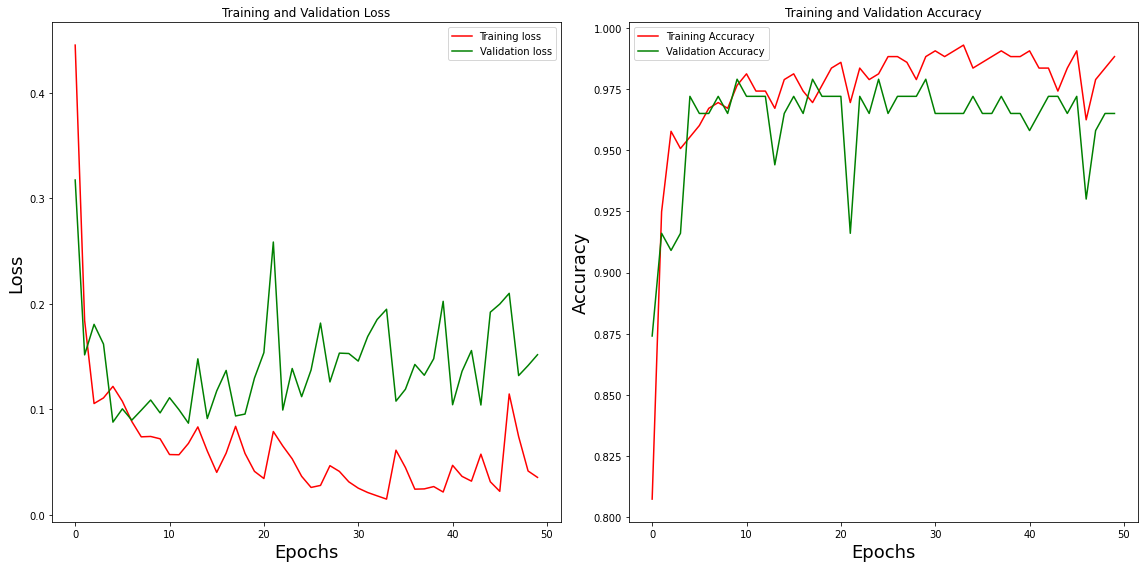

In [12]:
def plot_auc_acc_loss(epochs):
    tacc = Train_Acc
    tloss = Train_Loss

    vacc = Test_Acc
    vloss = Test_Loss


    Epochs = [i for i in range(epochs)]

#     plt.style.use('fivethirtyeight')
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    axes[0].plot(Epochs, tloss, 'r', label='Training loss')
    axes[0].plot(Epochs, vloss, 'g', label='Validation loss')
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs', fontsize=18)
    axes[0].set_ylabel('Loss', fontsize=18)
    axes[0].legend()

    axes[1].plot(Epochs, tacc, 'r', label='Training Accuracy')
    axes[1].plot(Epochs, vacc, 'g', label='Validation Accuracy')
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs', fontsize=18)
    axes[1].set_ylabel('Accuracy', fontsize=18)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

    return Epochs

Epochs = plot_auc_acc_loss(epochs)

there were 5 errors in 143 tests for an accuracy of  96.50%


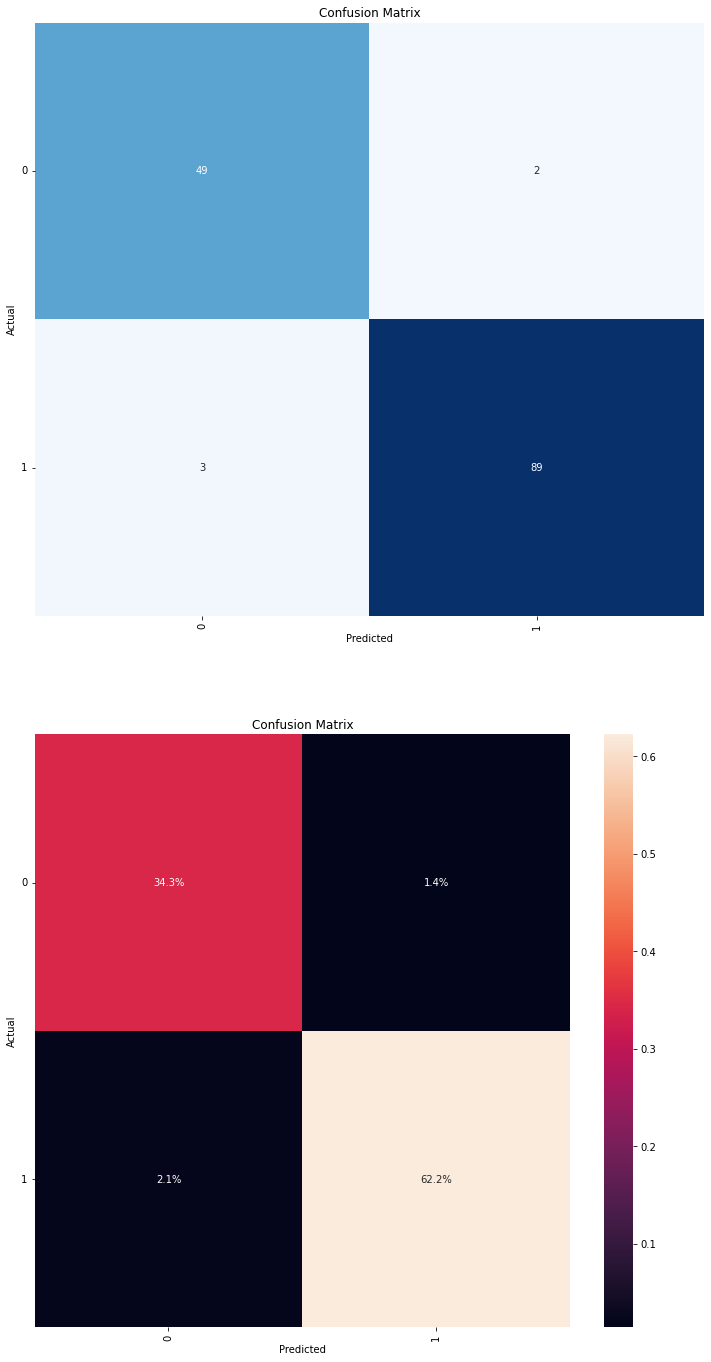

Classification Report:
----------------------
               precision    recall  f1-score   support

           0     0.9423    0.9608    0.9515        51
           1     0.9780    0.9674    0.9727        92

    accuracy                         0.9650       143
   macro avg     0.9602    0.9641    0.9621       143
weighted avg     0.9653    0.9650    0.9651       143



In [13]:
def predictor(test_ds):
    classes = list(target.values())
    class_count = len(classes)
    errors = 0
    y_true = []
    y_pred = []
    preds = tf.argmax(net.predict(test_ds), axis=1)
    tests = len(preds)
    for X_test, y_test in test_ds:
        preds = tf.argmax(net.predict(X_test), axis=1)
        for i in range(len(preds)):
            y_true.append(y_test.numpy()[i])
            y_pred.append(preds.numpy()[i])
            if np.array(preds)[i] != np.array(y_test)[i]:
                errors += 1
                
    acc = (1 - errors / tests) * 100
    msg = f'there were {errors} errors in {tests} tests for an accuracy of {acc:6.2f}%'
    print(msg)
    ypred = np.array(y_pred)
    ytrue = np.array(y_true)
    f1score = f1_score(ytrue, ypred, average='weighted') * 100

    if class_count <= 30:
        cm = confusion_matrix(y_true, y_pred)
        
        plt.figure(figsize=(12, 24))
        plt.subplot(2, 1, 1)
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
        plt.xticks(np.arange(class_count) + .5, classes, rotation=90)
        plt.yticks(np.arange(class_count) + .5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        
        plt.subplot(2, 1, 2)
        sns.heatmap(cm / np.sum(cm), annot=True, fmt='.1%')
        plt.xticks(np.arange(class_count) + .5, classes, rotation=90)
        plt.yticks(np.arange(class_count) + .5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        
        plt.show()

    clr = classification_report(y_true, y_pred, digits=4)
    print("Classification Report:\n----------------------\n", clr)

    return errors, f1score

errors, f1score = predictor(test_ds)